<a href="https://colab.research.google.com/github/jfurlano/ClasificadorCalificaciones/blob/main/TareaFinal_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Final
Seminario de Técnologias

Clasificación de resultados para determinar si los estudiantes pasan al siguiente año.


José Roberto Furlán Ortíz

1690-17-21852

jfurlano@miumg.edu.gt

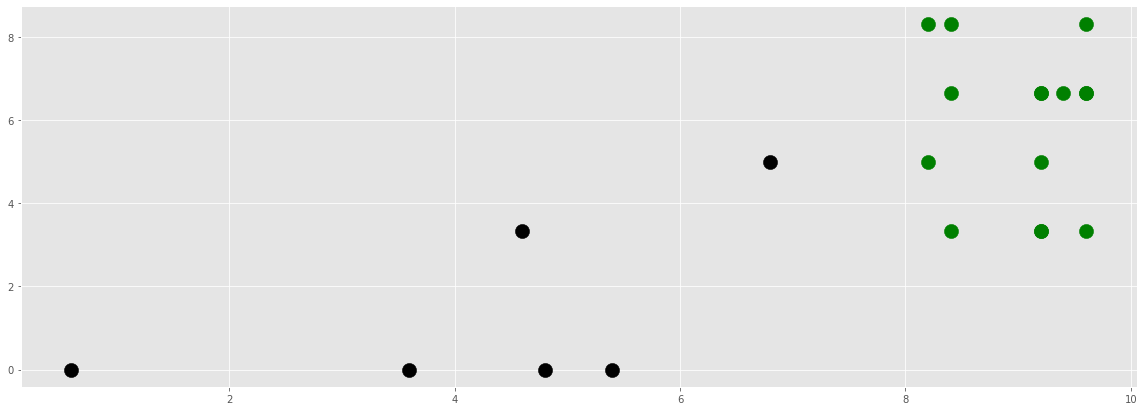

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = (20,7) 
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

def plot_points(X, Y):
    aceptado = X[np.argwhere(Y==1)]
    rechazado = X[np.argwhere(Y==0)]
    plt.scatter([s[0][0] for s in rechazado], [s[0][1] for s in rechazado], s = 200, c = 'black', marker="o")
    plt.scatter([s[0][0] for s in aceptado], [s[0][1] for s in aceptado], s = 200, c = 'green',marker="o")
    
def display(m, b, color='b--'):
    plt.xlim(-0.5,10)
    plt.ylim(-0.5,10)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)
    
df = pd.read_csv('DatosCalificaciones.csv',header=None,names=['Carnet','Total50','EjeX','Total6','EjeY','TotalProporcional','Tipo'])

X = np.array(df[['EjeX','EjeY']])
y = np.array(df['Tipo'])
plot_points(X,y)
plt.show()


In [395]:
import numpy as np
np.random.seed(66)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.1):
    # Fill in code
    for i in range(len(X)):
        result_y=prediction(X[i], W, b)
        if y[i]-result_y==1:
            W[0]+=X[i][0]*learn_rate
            W[1]+=X[i][1]*learn_rate
            b+=learn_rate
        if y[i]-result_y==-1:
            W[0]-=X[i][0]*learn_rate
            W[1]-=X[i][1]*learn_rate
            b-=learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate = 0.2, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
   
    boundary_lines = []

    for i in range(num_epochs):

        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        '''
        Solo para las impresiones de las lineas
        '''
        if i % (num_epochs / 2) == 0:
            display(-W[0]/W[1], -b/W[1])  

    plt.title("Limites")
    display(-W[0]/W[1], -b/W[1], 'black')
    plot_points(X, y)
    plt.show()
    return boundary_lines

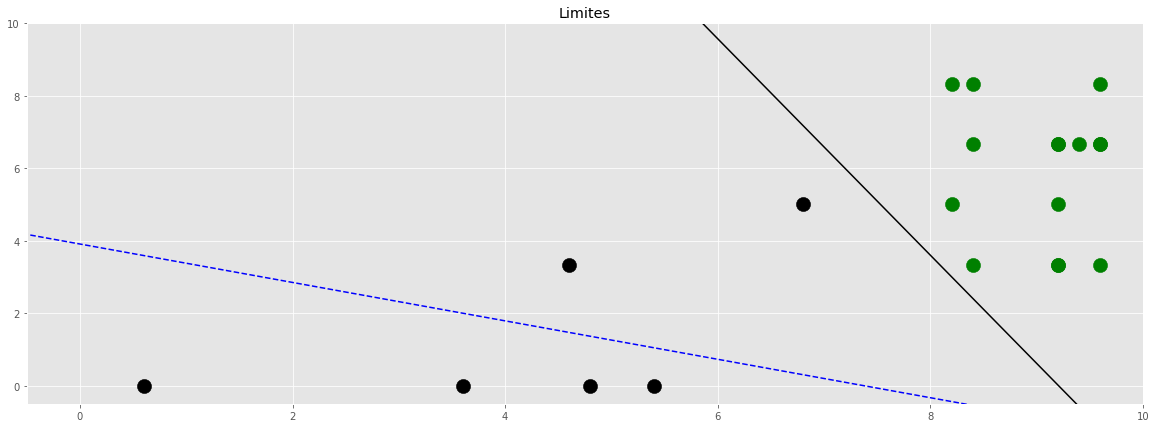

[(array([-0.10516982]), array([-6.38205558])),
 (array([-0.14729702]), array([-4.1068038])),
 (array([0.64006782]), array([-3.73186817])),
 (array([0.04489142]), array([-2.70060587])),
 (array([-0.0098896]), array([-2.0082548])),
 (array([0.11670309]), array([-2.03040698])),
 (array([0.05412963]), array([-1.51635004])),
 (array([0.49619229]), array([-1.30584401])),
 (array([0.01023329]), array([-1.06618545])),
 (array([0.08847097]), array([-1.0070121])),
 (array([0.2336194]), array([-0.86186367])),
 (array([0.10675614]), array([-0.83220544])),
 (array([0.26463566]), array([-0.67432592])),
 (array([0.23305976]), array([-0.56907291])),
 (array([0.20148385]), array([-0.4638199])),
 (array([0.16990795]), array([-0.35856688])),
 (array([0.13833204]), array([-0.25331387])),
 (array([0.07518023]), array([-0.20068736])),
 (array([-0.04450133]), array([-0.16229597])),
 (array([0.09394558]), array([-0.04692354])),
 (array([0.02472213]), array([0.01076267])),
 (array([0.26700422]), array([0.12613

In [396]:
trainPerceptronAlgorithm(X,y)
